In [1]:
!python borough_complaints.py -i nyc_311_2024.csv -s 2024-01-01 -e 2024-02-29 -o jan_feb_counts_sorted.csv

In [2]:
import csv
from collections import Counter 

by_type_total = Counter()

with open("jan_feb_counts_sorted.csv","r") as f:
    rows = csv.DictReader(f)
    print("Column names:", rows.fieldnames)
    
    for row in rows:
        count=0
        ctype = (row.get("complain type","")).strip()
        count = int((row.get("count","0")).strip())
        if ctype:
            by_type_total[ctype] += count

top_complaint = by_type_total.most_common(1)[0][0] #return most freq complaint 
print("Top Complaint (Jan-Fab-2024)", top_complaint)
print("Top 5 Complaints (Jan-Fab-2024)", by_type_total.most_common(5))


Column names: ['complain type', 'borough', 'count']
Top Complaint (Jan-Fab-2024) heat/hot water
Top 5 Complaints (Jan-Fab-2024) [('heat/hot water', 81641), ('illegal parking', 79916), ('noise - residential', 43602), ('blocked driveway', 28608), ('unsanitary condition', 19208)]


In [3]:
!python borough_complaints.py -i nyc_311_2024.csv -s 2024-06-01 -e 2024-07-31 -o jun_jul_counts_sorted.csv

In [4]:
import csv
from collections import Counter 

by_type_total = Counter()

with open("jun_jul_counts_sorted.csv","r") as f:
    rows = csv.DictReader(f)
    print("Column names:", rows.fieldnames)
    
    for row in rows:
        count=0
        ctype = (row.get("complain type","")).strip()
        count = int((row.get("count","0")).strip())
        if ctype:
            by_type_total[ctype] += count

top_complaint = by_type_total.most_common(1)[0][0] #return most freq complaint 
print("Top Complaint (Jun-Jul-2024)", top_complaint)
print("Top 5 Complaints (Jun-Jul-2024)", by_type_total.most_common(5))

Column names: ['complain type', 'borough', 'count']
Top Complaint (Jun-Jul-2024) illegal parking
Top 5 Complaints (Jun-Jul-2024) [('illegal parking', 86240), ('noise - residential', 58197), ('noise - street/sidewalk', 47320), ('blocked driveway', 27193), ('water system', 21653)]


In [5]:
import csv 
import matplotlib.pyplot as plt
from datetime import datetime 
from collections import Counter, defaultdict


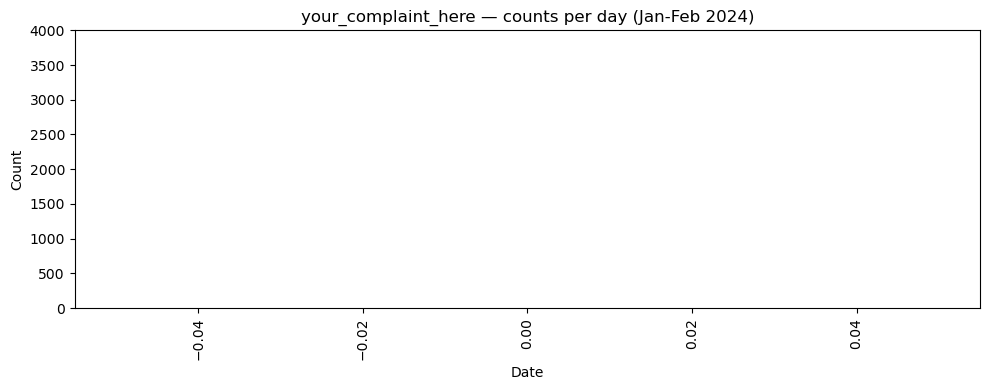

In [9]:
import csv
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt

CREATED_COL = "Created Date"
COMPLAINT_COL = "Complaint Type"

def parse_dt(s):
    if not s: return None
    for fmt in ("%m/%d/%Y %I:%M:%S %p","%m/%d/%Y %H:%M","%Y-%m-%d %H:%M:%S","%Y-%m-%d"):
        try: return datetime.strptime(s, fmt)
        except ValueError: pass
    return None

start_jf = datetime(2024,1,1)
end_jf   = datetime(2024,3,1)

def analyze_daily_complaints(file_path, complaint, start_date, end_date):

    daily = {}

    with open(file_path,"r") as f:
        r = csv.DictReader(f)
        for row in r:
            dt = parse_dt(row.get(CREATED_COL,""))
            if dt is None or not (start_date <= dt < end_date): 
                continue
            if row.get(COMPLAINT_COL,"").strip().lower() != complaint:
                continue

            daily[dt.date()] = daily.get(dt.date(), 0) + 1

    return daily

jf_daily = analyze_daily_complaints("nyc_311_2024.csv", top_complaint, start_jf, end_jf)


dates = sorted(jf_daily.keys())
counts = [jf_daily[d] for d in dates]
labels = [d.isoformat() for d in dates]

plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.title(f"{top_complaint} — counts per day (Jan-Feb 2024)")
plt.xlabel("Date"); plt.ylabel("Count")
plt.xticks(rotation=90)
plt.ylim([0, 4000])
plt.tight_layout(); plt.show()

Totals for illegal parking
Jan-Feb: 79916
Jun-Jul: 86240


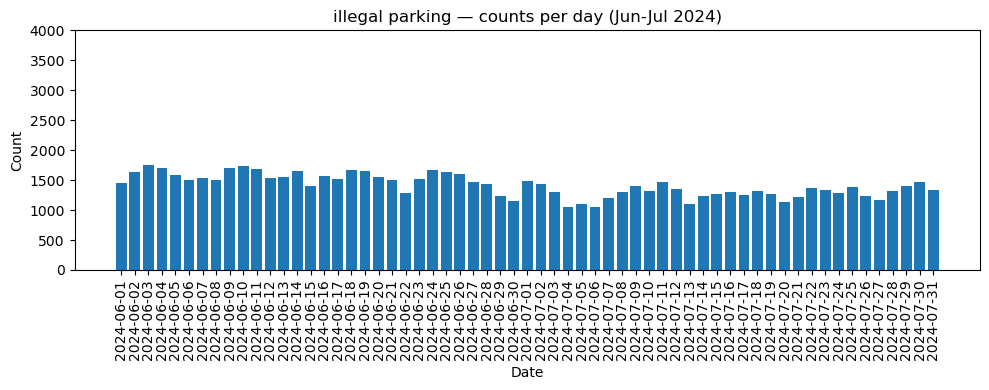

In [7]:
start_jf = datetime(2024,6,1)
end_jf   = datetime(2024,8,1)#exclusive 

jj_daily = analyze_daily_complaints("nyc_311_2024.csv", top_complaint, start_jf, end_jf)

print("Totals for", top_complaint)
print("Jan-Feb:", sum(jf_daily.values()))
print("Jun-Jul:", sum(jj_daily.values()))


dates = sorted(jj_daily.keys())
counts = [jj_daily[d] for d in dates]
labels = [d.isoformat() for d in dates]

plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.title(f"{top_complaint} — counts per day (Jun-Jul 2024)")
plt.xlabel("Date"); plt.ylabel("Count")
plt.xticks(rotation=90)
plt.ylim([0, 4000])
plt.tight_layout(); plt.show()
